In [1]:
import requests
import json
import pandas as pd
from datetime import datetime, timedelta
import webio as wb
import asyncio

__KRX_CODES = pd.read_csv('KRX_CODES.csv', encoding='euc-kr')

In [2]:
def fullcode(code):
    return __KRX_CODES.loc[__KRX_CODES['short_code'] == code]['full_code']

## 개별종목 시세

In [37]:
def krxdailyreader(full_code, from_date, to_date):
    headers = {'User-Agent': 'Chrome/78.0.3904.87 Safari/537.36',}
    data = {
        'bld': 'dbms/MDC/STAT/standard/MDCSTAT01701',
        'locale': 'ko_KR',
        'isuCd': full_code,
        'isuCd2': '',
        'strtDd': from_date,
        'endDd': to_date,
        'adjStkPrc_check': 'Y',
        'adjStkPrc': 2,
        'share': '1',
        'money': '1',
        'csvxls_isNo': 'false',
    }

    url = 'http://data.krx.co.kr/comm/bldAttendant/getJsonData.cmd'
    r = requests.post(url, data, headers=headers)
    df = pd.DataFrame(r.json()['output'])
    col_map = {'TRD_DD':'Date', 'ISU_CD':'Code', 'ISU_NM':'Name', 'MKT_NM':'Market', 
                'SECUGRP_NM':'SecuGroup', 'TDD_CLSPRC':'Close', 'FLUC_TP_CD':'UpDown', 
                'CMPPREVDD_PRC':'Comp', 'FLUC_RT':'Change', 
                'TDD_OPNPRC':'Open', 'TDD_HGPRC':'High', 'TDD_LWPRC':'Low', 
                'ACC_TRDVOL':'Volume', 'ACC_TRDVAL':'Amount', 'MKTCAP':'MarCap', 'LIST_SHRS':'Shares'}
    
    df = df.rename(columns=col_map)
    return df
    """num_cols = ['Close', 'UpDown', 'Comp', 'Change', 'Open', 'High', 'Low', 'Volume', 'Amount', 'MarCap', 'Shares']
    for col in num_cols: 
        df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')

    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    df = df.sort_index()

    return df[['Open', 'High', 'Low', 'Close', 'Volume', 'Change', 'UpDown', 'Comp', 'Amount', 'MarCap', 'Shares']]
"""

In [38]:
krxdailyreader(fullcode('005930'), '20151201', '20231201')

,Date,Close,UpDown,Comp,Change,Open,High,Low,Volume,Amount,MarCap,Shares
0,2023/12/01,"72,000",2,-800,-1.10,"72,400","72,500","71,700","9,871,284","710,939,612,000","429,824,343,600,000","5,969,782,550"
1,2023/11/30,"72,800",1,100,0.14,"72,700","72,800","72,200","15,783,714","1,146,427,486,200","434,600,169,640,000","5,969,782,550"
2,2023/11/29,"72,700",3,0,0.00,"72,400","72,800","72,200","9,283,933","673,194,221,670","434,003,191,385,000","5,969,782,550"
3,2023/11/28,"72,700",1,"1,400",1.96,"71,400","72,700","71,300","13,283,081","958,103,901,900","434,003,191,385,000","5,969,782,550"
4,2023/11/27,"71,300",2,-400,-0.56,"71,500","72,100","71,100","9,113,857","651,549,770,446","425,645,495,815,000","5,969,782,550"
...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2015/12/07,"25,240",2,-140,-0.55,"25,380","25,500","25,240","196,107","248,640,873,010","185,891,763,294,000","147,299,337"
1965,2015/12/04,"25,380",2,-420,-1.63,"25,500","25,600","25,340","192,711","245,141,643,000","186,922,858,653,000","147,299,337"
1966,2015/12/03,"25,800",2,-200,-0.77,"25,900","25,940","25,720","166,695","215,155,295,000","190,016,144,730,000","147,299,337"
1967,2015/12/02,"26,000",2,-420,-1.59,"26,420","26,440","25,880","229,628","300,783,972,034","191,489,138,100,000","147,299,337"


In [77]:
# 2년
# 국문 인코딩된 것들이 있음 예를들어 %EA%B5%AD%EA%B3%A003875-4309(23-9) -> 국고03875-4309(23-9) 임

def krxstockindexreader():
    headers = {'User-Agent': 'Chrome/78.0.3904.87 Safari/537.36',}
    data = {
        'bld': 'dbms/MDC/STAT/standard/MDCSTAT00301',
        'locale': 'ko_KR',
        'tboxindIdx_finder_equidx0_0': 'KRX 300 헬스케어',
        'indIdx': '5',
        'indIdx2': '355',
        'codeNmindIdx_finder_equidx0_0': 'KRX 300 헬스케어',
        'param1indIdx_finder_equidx0_0': '',
        'strtDd': '20221207',
        'endDd': '20231215',
        'share': '2',
        'money': '3',
        'csvxls_isNo': 'false',
    }

    url = 'http://data.krx.co.kr/comm/bldAttendant/getJsonData.cmd'
    r = requests.post(url, data, headers=headers)
    print(r)
    df = pd.DataFrame(r.json()['output'])
    return df

# 2년
def krxfuturesindexreader():
    headers = {'User-Agent': 'Chrome/78.0.3904.87 Safari/537.36',}
    data = {
        'bld': 'dbms/MDC/STAT/standard/MDCSTAT01201',
        'locale': 'ko_KR',
        'indTpCd': 5,
        'idxIndCd': 902,
        'tboxidxCd_finder_drvetcidx0_2': 'KRX 300 선물지수',
        'idxCd': 5,
        'idxCd2': 902,
        'codeNmidxCd_finder_drvetcidx0_2': 'KRX 300 선물지수',
        'param1idxCd_finder_drvetcidx0_2': '',
        'strtDd': '20221207',
        'endDd': '20231215',
        'csvxls_isNo': 'false'
    }

    url = 'http://data.krx.co.kr/comm/bldAttendant/getJsonData.cmd'
    r = requests.post(url, data, headers=headers)
    print(r)
    df = pd.DataFrame(r.json()['output'])
    return df

# etf/etn/etw/bond/futures
def krxetfindexreader():
    headers = {'User-Agent': 'Chrome/78.0.3904.87 Safari/537.36',}
    data = {'bld': 'dbms/MDC/STAT/standard/MDCSTAT04501',
            'locale': 'ko_KR',
            'tboxisuCd_finder_secuprodisu1_4': '148020%2FKBSTAR+200',
            'isuCd': 'KR7148020001',
            'isuCd2': 'KR7152100004',
            'codeNmisuCd_finder_secuprodisu1_4': 'KBSTAR+200',
            'param1isuCd_finder_secuprodisu1_4': '',
            'strtDd': '20191207',
            'endDd': '20231215',
            'share': '1',
            'money': '1',
            'csvxls_isNo': 'false'}

    url = 'http://data.krx.co.kr/comm/bldAttendant/getJsonData.cmd'
    r = requests.post(url, data, headers=headers)
    print(r)
    df = pd.DataFrame(r.json()['output'])
    return df

def krxetnindexreader():
    headers = {'User-Agent': 'Chrome/78.0.3904.87 Safari/537.36',}
    data = {'bld': 'dbms/MDC/STAT/standard/MDCSTAT06601',
            'locale': 'ko_KR',
            'tboxisuCd_finder_secuprodisu2_5': '580035%2FKB+S%26P+%EC%9C%A0%EB%9F%BD%ED%83%84%EC%86%8C%EB%B0%B0%EC%B6%9C%EA%B6%8C+%EC%84%A0%EB%AC%BC+ETN(H)',
            'isuCd': 'KRG580000351',
            'isuCd2': '',
            'codeNmisuCd_finder_secuprodisu2_5': 'KB+S%26P+%EC%9C%A0%EB%9F%BD%ED%83%84%EC%86%8C%EB%B0%B0%EC%B6%9C%EA%B6%8C+%EC%84%A0%EB%AC%BC+ETN(H)',
            'param1isuCd_finder_secuprodisu2_5': '',
            'strtDd': '20151207',
            'endDd': '20231215',
            'share': '1',
            'money': '1',
            'csvxls_isNo': 'false'}

    url = 'http://data.krx.co.kr/comm/bldAttendant/getJsonData.cmd'
    r = requests.post(url, data, headers=headers)
    print(r)
    df = pd.DataFrame(r.json()['output'])
    return df

#국채전문유통시장
#2년, 없을 수 없음
#개별종목은 필요없긴함. 3년물, 5년물, 10년물, 30년물 찾아보자
def krxbondindexreader():
    headers = {'User-Agent': 'Chrome/78.0.3904.87 Safari/537.36',}
    data = {'bld': 'dbms/MDC/STAT/standard/MDCSTAT09901',
            'locale': 'ko_KR',
            'mktId': 'KTS',
            'tboxisuCd_finder_bondisu0_7': 'KR103504GD96%2F%EA%B5%AD%EA%B3%A003875-4309(23-9)',
            'isuCd': 'KR103504GD96',
            'isuCd2': '',
            'codeNmisuCd_finder_bondisu0_7': '%EA%B5%AD%EA%B3%A003875-4309(23-9)',
            'param1isuCd_finder_bondisu0_7': '1',
            'strtDd': '20221207',
            'endDd': '20231215',
            'money': '2',
            'csvxls_isNo': 'false'}

    url = 'http://data.krx.co.kr/comm/bldAttendant/getJsonData.cmd'
    r = requests.post(url, data, headers=headers)
    print(r)
    df = pd.DataFrame(r.json()['output'])
    return df

def krxfuturesindexreader():
    headers = {'User-Agent': 'Chrome/78.0.3904.87 Safari/537.36',}
    data = {'bld': 'dbms/MDC/STAT/standard/MDCSTAT12601',
            'locale': 'ko_KR',
            'strtDd': '20191213',
            'endDd': '20221208',
            'tboxisuCd_finder_drvprodisu0_8': '101SC000%2F%EC%BD%94%EC%8A%A4%ED%94%BC200+F+202212',
            'isuCd': 'KR4101SC0009',
            'isuCd2': 'KR4101SC0009',
            'codeNmisuCd_finder_drvprodisu0_8': '%EC%BD%94%EC%8A%A4%ED%94%BC200+F+202212',
            'param1isuCd_finder_drvprodisu0_8': '',
            'strtDdBox1': '20191213',
            'endDdBox1': '20221208',
            'strtDdBox2': '20231207',
            'endDdBox2': '20231215',
            'juya': 'ALL',
            'rghtTpCd': 'T',
            'share': '1',
            'money': '3',
            'csvxls_isNo': 'false'}

    url = 'http://data.krx.co.kr/comm/bldAttendant/getJsonData.cmd'
    r = requests.post(url, data, headers=headers)
    print(r)
    df = pd.DataFrame(r.json()['output'])
    return df

In [76]:
def htmltoform(str):
    dic = {}
    str_list = str.split('&')
    for item in str_list:
        tmp = item.split('=')
        dic[tmp[0]] = tmp[1]
    return dic

htmltoform('bld=dbms/MDC/STAT/standard/MDCSTAT12601&locale=ko_KR&strtDd=20191213&endDd=20221208&tboxisuCd_finder_drvprodisu0_8=101SC000%2F%EC%BD%94%EC%8A%A4%ED%94%BC200+F+202212&isuCd=KR4101SC0009&isuCd2=KR4101SC0009&codeNmisuCd_finder_drvprodisu0_8=%EC%BD%94%EC%8A%A4%ED%94%BC200+F+202212&param1isuCd_finder_drvprodisu0_8=&strtDdBox1=20191213&endDdBox1=20221208&strtDdBox2=20231207&endDdBox2=20231215&juya=ALL&rghtTpCd=T&share=1&money=3&csvxls_isNo=false')

{'bld': 'dbms/MDC/STAT/standard/MDCSTAT12601',
 'locale': 'ko_KR',
 'strtDd': '20191213',
 'endDd': '20221208',
 'tboxisuCd_finder_drvprodisu0_8': '101SC000%2F%EC%BD%94%EC%8A%A4%ED%94%BC200+F+202212',
 'isuCd': 'KR4101SC0009',
 'isuCd2': 'KR4101SC0009',
 'codeNmisuCd_finder_drvprodisu0_8': '%EC%BD%94%EC%8A%A4%ED%94%BC200+F+202212',
 'param1isuCd_finder_drvprodisu0_8': '',
 'strtDdBox1': '20191213',
 'endDdBox1': '20221208',
 'strtDdBox2': '20231207',
 'endDdBox2': '20231215',
 'juya': 'ALL',
 'rghtTpCd': 'T',
 'share': '1',
 'money': '3',
 'csvxls_isNo': 'false'}

In [78]:
krxfuturesindexreader()

<Response [200]>


,TRD_DD,TDD_CLSPRC,FLUC_TP_CD,CMPPREVDD_PRC,TDD_OPNPRC,TDD_HGPRC,TDD_LWPRC,SPOT_PRC,SETL_PRC,ACC_TRDVOL,ACC_TRDVAL,ACC_OPNINT_QTY
0,2022/12/08 (주간),307.60,2,-0.60,308.55,309.10,306.20,308.24,307.60,"178,084","13,689,917,262,500",0
1,2022/12/07 (주간),308.20,2,-1.95,309.15,310.30,308.10,308.27,308.20,"280,239","21,661,804,575,000","129,794"
2,2022/12/06 (주간),310.15,2,-4.20,311.20,313.30,309.70,310.14,310.15,"308,820","24,054,307,850,000","188,896"
3,2022/12/05 (주간),314.35,2,-0.65,316.15,317.10,313.20,313.91,314.35,"331,975","26,138,075,100,000","248,772"
4,2022/12/02 (주간),315.00,2,-8.10,321.50,321.80,314.95,315.02,315.00,"302,406","24,016,160,650,000","304,840"
...,...,...,...,...,...,...,...,...,...,...,...,...
984,2019/12/17 (야간),-,2,-,-,-,-,294.40,0.00,0,0,200
985,2019/12/16 (주간),-,2,-,-,-,-,289.76,284.20,0,0,200
986,2019/12/16 (야간),-,2,-,-,-,-,289.76,0.00,0,0,200
987,2019/12/13 (주간),-,2,-,-,-,-,290.11,285.00,200,"14,005,000,000",200


## 전종목 기본정보

In [5]:
# 주식 기본정보
def stock():
    headers = {'User-Agent': 'Chrome/78.0.3904.87 Safari/537.36',}
    data = {'bld': 'dbms/MDC/STAT/standard/MDCSTAT01901',
 'locale': 'ko_KR',
 'mktId': 'ALL',
 'share': '1',
 'csvxls_isNo': 'false'}

    url = 'http://data.krx.co.kr/comm/bldAttendant/getJsonData.cmd'
    r = requests.post(url, data, headers=headers)
    print(r)
    df = pd.DataFrame(r.json()['OutBlock_1'])
    return df

# 지수 기본정보
def index():
    headers = {'User-Agent': 'Chrome/78.0.3904.87 Safari/537.36',}
    data = {'bld': 'dbms/MDC/STAT/standard/MDCSTAT00401',
 'locale': 'ko_KR',
 'idxIndMidclssCd': '01',
 'csvxls_isNo': 'false'}

    url = 'http://data.krx.co.kr/comm/bldAttendant/getJsonData.cmd'
    r = requests.post(url, data, headers=headers)
    print(r)
    df = pd.DataFrame(r.json()['output'])
    return df

def derivatives_index():
    headers = {'User-Agent': 'Chrome/78.0.3904.87 Safari/537.36',}
    data = {'bld': 'dbms/MDC/STAT/standard/MDCSTAT01301',
 'locale': 'ko_KR',
 'idxTp': '0201',
 'csvxls_isNo': 'false'}

    url = 'http://data.krx.co.kr/comm/bldAttendant/getJsonData.cmd'
    r = requests.post(url, data, headers=headers)
    print(r)
    df = pd.DataFrame(r.json()['OutBlock_1'])
    return df

def etf():
    headers = {'User-Agent': 'Chrome/78.0.3904.87 Safari/537.36',}
    data = {'bld': 'dbms/MDC/STAT/standard/MDCSTAT04601',
 'locale': 'ko_KR',
 'share': '1',
 'csvxls_isNo': 'false'}

    url = 'http://data.krx.co.kr/comm/bldAttendant/getJsonData.cmd'
    r = requests.post(url, data, headers=headers)
    print(r)
    df = pd.DataFrame(r.json()['output'])
    return df

def etn():
    headers = {'User-Agent': 'Chrome/78.0.3904.87 Safari/537.36',}
    data = {'bld': 'dbms/MDC/STAT/standard/MDCSTAT06701',
 'locale': 'ko_KR',
 'share': '1',
 'csvxls_isNo': 'false'}

    url = 'http://data.krx.co.kr/comm/bldAttendant/getJsonData.cmd'
    r = requests.post(url, data, headers=headers)
    print(r)
    df = pd.DataFrame(r.json()['output'])
    return df

def elw():
    headers = {'User-Agent': 'Chrome/78.0.3904.87 Safari/537.36',}
    data = {'bld': 'dbms/MDC/STAT/standard/MDCSTAT08501',
 'locale': 'ko_KR',
 'share': '1',
 'csvxls_isNo': 'false'}

    url = 'http://data.krx.co.kr/comm/bldAttendant/getJsonData.cmd'
    r = requests.post(url, data, headers=headers)
    print(r)
    df = pd.DataFrame(r.json()['output'])
    return df

def future():
    headers = {'User-Agent': 'Chrome/78.0.3904.87 Safari/537.36',}
    data = {'bld': 'dbms/MDC/STAT/standard/MDCSTAT12801',
 'locale': 'ko_KR',
 'prodId': 'KRDRVFUK2I',
 'csvxls_isNo': 'false'}

    url = 'http://data.krx.co.kr/comm/bldAttendant/getJsonData.cmd'
    r = requests.post(url, data, headers=headers)
    print(r)
    df = pd.DataFrame(r.json()['output'])
    return df

In [19]:
future().to_csv('future.csv', encoding='euc-kr')

<Response [200]>


## 비동기 프로그래밍

In [3]:
from webio import GET, POST
import asyncio
import json

import nest_asyncio
nest_asyncio.apply()

get = POST()

def krxdailyreader(full_code, from_date, to_date):
    headers = {'User-Agent': 'Chrome/78.0.3904.87 Safari/537.36',}
    data = {
        'bld': 'dbms/MDC/STAT/standard/MDCSTAT01701',
        'locale': 'ko_KR',
        'isuCd': full_code,
        'isuCd2': '',
        'strtDd': from_date,
        'endDd': to_date,
        'adjStkPrc_check': 'Y',
        'adjStkPrc': 2,
        'share': '1',
        'money': '1',
        'csvxls_isNo': 'false',
    }

    url = 'http://data.krx.co.kr/comm/bldAttendant/getJsonData.cmd'
    r =  asyncio.run(get.async_read([url], data=data, headers=headers))

    df = pd.DataFrame(json.loads(r[0])['output'])
    col_map = {'TRD_DD':'Date', 'ISU_CD':'Code', 'ISU_NM':'Name', 'MKT_NM':'Market', 
                'SECUGRP_NM':'SecuGroup', 'TDD_CLSPRC':'Close', 'FLUC_TP_CD':'UpDown', 
                'CMPPREVDD_PRC':'Comp', 'FLUC_RT':'Change', 
                'TDD_OPNPRC':'Open', 'TDD_HGPRC':'High', 'TDD_LWPRC':'Low', 
                'ACC_TRDVOL':'Volume', 'ACC_TRDVAL':'Amount', 'MKTCAP':'MarCap', 'LIST_SHRS':'Shares'}
    
    df = df.rename(columns=col_map)
    
    return df

In [4]:
a = krxdailyreader(fullcode('005930'), '20151201', '20231201')

TypeError: __init__() got an unexpected keyword argument 'data'

In [7]:
import json
pd.DataFrame(json.loads(b[0])['output'])

TypeError: 'coroutine' object is not subscriptable

In [32]:
a

,Date,Close,UpDown,Comp,Change,Open,High,Low,Volume,Amount,MarCap,Shares
0,2023/12/01,"72,000",2,-800,-1.10,"72,400","72,500","71,700","9,871,284","710,939,612,000","429,824,343,600,000","5,969,782,550"
1,2023/11/30,"72,800",1,100,0.14,"72,700","72,800","72,200","15,783,714","1,146,427,486,200","434,600,169,640,000","5,969,782,550"
2,2023/11/29,"72,700",3,0,0.00,"72,400","72,800","72,200","9,283,933","673,194,221,670","434,003,191,385,000","5,969,782,550"
3,2023/11/28,"72,700",1,"1,400",1.96,"71,400","72,700","71,300","13,283,081","958,103,901,900","434,003,191,385,000","5,969,782,550"
4,2023/11/27,"71,300",2,-400,-0.56,"71,500","72,100","71,100","9,113,857","651,549,770,446","425,645,495,815,000","5,969,782,550"
...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2015/12/07,"25,240",2,-140,-0.55,"25,380","25,500","25,240","196,107","248,640,873,010","185,891,763,294,000","147,299,337"
1965,2015/12/04,"25,380",2,-420,-1.63,"25,500","25,600","25,340","192,711","245,141,643,000","186,922,858,653,000","147,299,337"
1966,2015/12/03,"25,800",2,-200,-0.77,"25,900","25,940","25,720","166,695","215,155,295,000","190,016,144,730,000","147,299,337"
1967,2015/12/02,"26,000",2,-420,-1.59,"26,420","26,440","25,880","229,628","300,783,972,034","191,489,138,100,000","147,299,337"


In [34]:
a.drop(~['UpDown', 'Comp'], axis=1)

TypeError: bad operand type for unary ~: 'list'

In [2]:

start = '20231212'
end = '20231215'
url = 'http://data.krx.co.kr/comm/bldAttendant/getJsonData.cmd'
data = {
'bld': 'dbms/MDC/STAT/standard/MDCSTAT01701',
'locale': 'ko_KR',
'isuCd': '',
'isuCd2': '',
'strtDd': start,
'endDd': end,
'adjStkPrc_check': 'Y',
'adjStkPrc': 2,
'share': '1',
'money': '1',
'csvxls_isNo': 'false',
}
datas = [{**data, 'isuCd': ticker} for ticker in tickers]

In [1]:
from krx import KrxDailyReader
tickers = ['005930', '273060']
import asyncio
import nest_asyncio
nest_asyncio.apply()
tmp = KrxDailyReader(tickers)



In [4]:
%%time

a = asyncio.run(tmp.run())

CPU times: total: 62.5 ms
Wall time: 2.28 s


In [10]:
import FinanceDataReader as fdr

fdr.DataReader('NAVER:005930')

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1999-08-30,4520,4620,4340,4340,879129,NaN
1999-08-31,4260,4490,4260,4480,1086024,0.032258
1999-09-01,4600,4680,4360,4370,1506536,-0.024554
1999-09-02,4290,4560,4270,4500,1188782,0.029748
1999-09-03,4560,4890,4460,4820,1819980,0.071111
...,...,...,...,...,...,...
2023-12-11,72800,73000,72200,73000,9861960,0.005510
2023-12-12,73300,73500,73100,73500,13758646,0.006849
2023-12-13,73300,73500,72800,72800,13116766,-0.009524


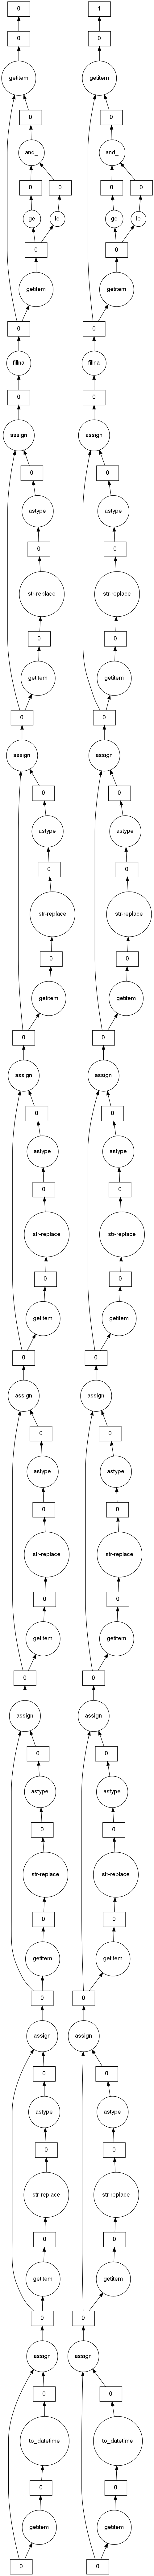

In [11]:
a.visualize()